# 9 Morphological Image Processing

## 9.2 Erosion and Dilation

### 9.2.1 Erosion

### Function `imdilate` and `imerode`

Toolbox function `imdilate` performs dilation. Its basic calling syntax is

**D = imdilate(A, B)**

Similarly, function `imerode` performs erosion, which has the same syntax as function `imdilate`.

### Function `strel`

Toolbox function `strel` costructs structuring elements with a veriety of shapes and sizes. Its basic syntax is

**se = strel(shape, parameters)**

where `shape` is a string specifying the desired shape, and `parameters` is a list of parameters that specify information about the shape, such as its size.

|Syntax Form|Description|
|:--|:--|
|se = strel('square', W)|Creates a square structuring elemet whose width is $W$ pixels.|
|se = strel('disk', R)|Creates a flat, disk-shaped structuring element with radius $R$.|

### Example 9.1: Using erosion to remove image conponents.

Supposed that we wish to remove the lines connecting the center region to the border pads in Fig. 9.5(a).

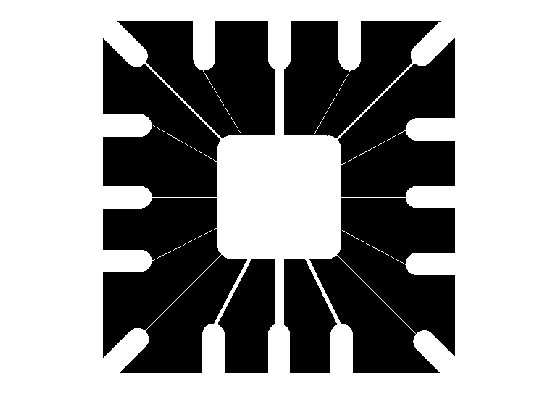

In [7]:
f = imread('Fig0905(a).tif');
imshow(f);

Eroding the image with a square structuring element of size $11\times 11$ whose components are all 1s removed most of the lines. The reason the two vertical lines in the center were thinned but not removed completely is that their width is greater than 11 pixels.

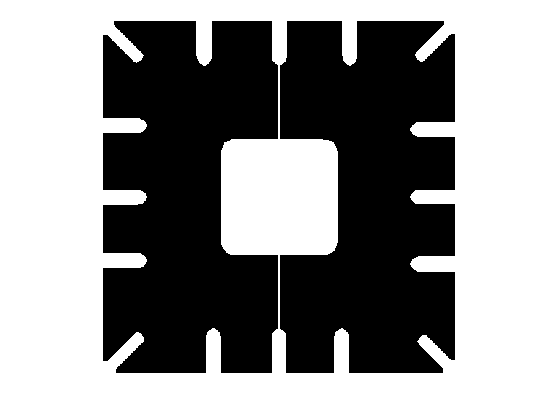

In [13]:
b11 = strel('square', 11);
g11 = imerode(f, b11);
figure, imshow(g11);

Changing the SE size to $15\times 15$ and eroding the original image again did remove all the connecting lines.

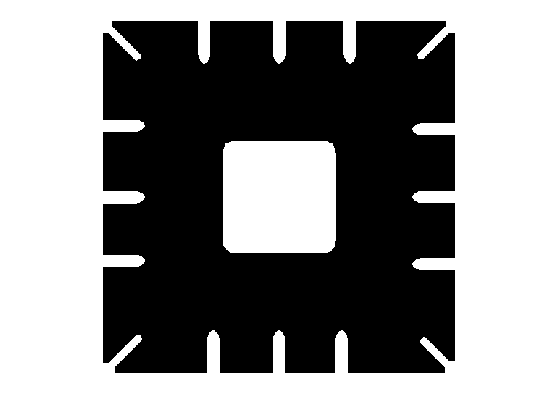

In [14]:
b15 = strel('square', 15);
g15 = imerode(f, b15);
figure, imshow(g15);

Increasing the size of the structing element even more would eliminate larger components. For example, the border pads can be removed with a structuring element of size $45\times 45$.

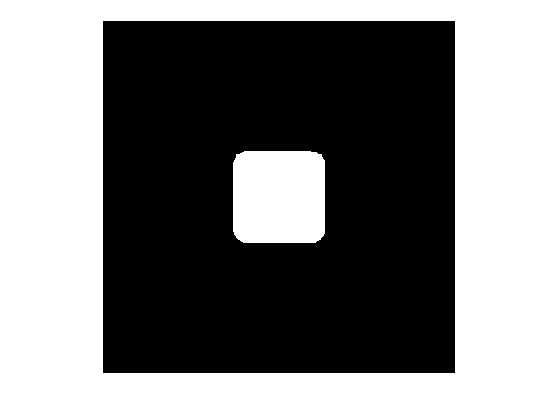

In [15]:
b45 = strel('square', 45);
g45 = imerode(f, b45);
figure, imshow(g45);

### 9.2.2 Dilation

### Example 9.2: An illustration of dilation.

One of the simplest applications of dilation is for bridging gaps. Figure 9.7(a) shows the same image with broken characters. The maximum length of the breaks is known to be two pixels.

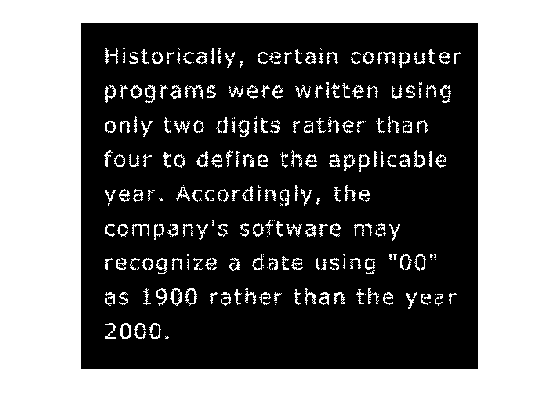

In [16]:
f = imread('Fig0907(a).tif');
imshow(f);

$b$ is a structuring element that can be used for repairing the gaps.

In [17]:
b = [0 1 0; 1 1 1; 0 1 0]


b =

     0     1     0
     1     1     1
     0     1     0




The next image shows the result of dilating the original image with structuring element $b$. The gaps were bridged.

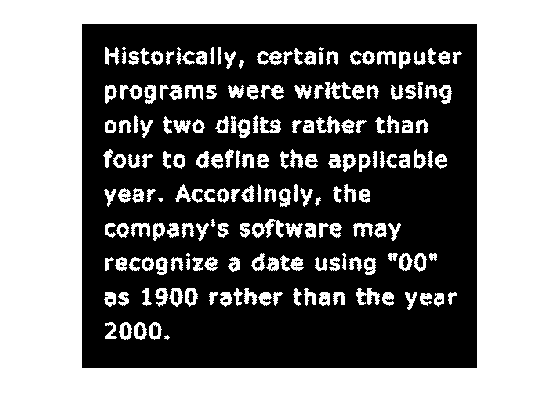

In [18]:
g = imdilate(f, b);
figure, imshow(g);

## 9.3 Opening and Closing

### Function `imopen` and `imclose`

Opening and closing are implemented by toolbox functions `imopen` and `imclose`. These functions have the syntax forms

**C = imopen(A, B)**

and

**C = imclose(A, B)**

### Example 9.4 Use of opening and closing for morphological filtering.

The binary image in Fig. 9.11(a) shows a section of a fingerprint corrupted by noise. The objective is to eliminate the noise and its effects on the print while distorting it as little as possible. A morphological filter consisting of opening followed by closing can be used to accomplish this objective.

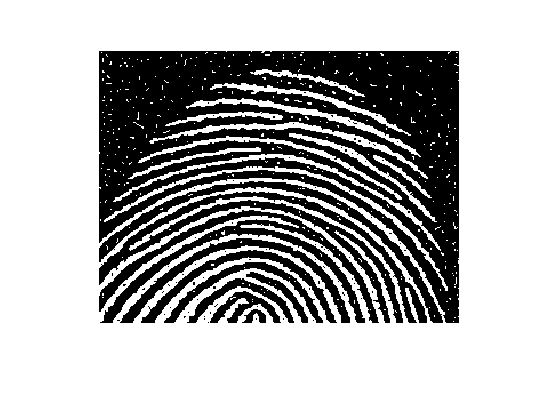

In [19]:
f = imread('Fig0911(a).tif');
imshow(f);

$b$ is the structuring element used.

In [21]:
b = ones(3, 3)


b =

     1     1     1
     1     1     1
     1     1     1




The next image shows the result of eroding the original image with the structuring element $b$. The background noise was completely eliminated in the erosion stage of opening because in this case all noise components are smaller than the structuring element.

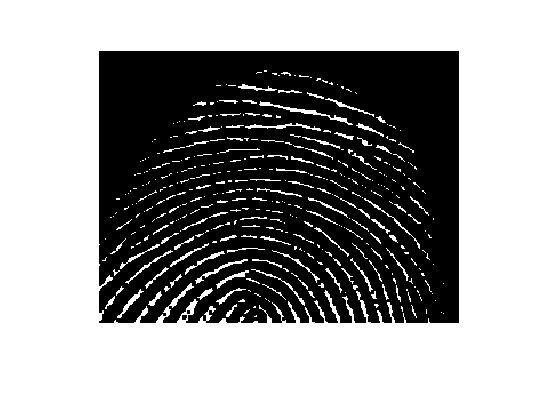

In [22]:
fe = imerode(f, b);
figure, imshow(fe);

The size of the noise elements (dark spots) contained within the fingerprint actually increased in size. The reason is that these elements are inner boundaries that increase in size as the object is eroded. This enlargement is countered by performing dilation on the previous image.

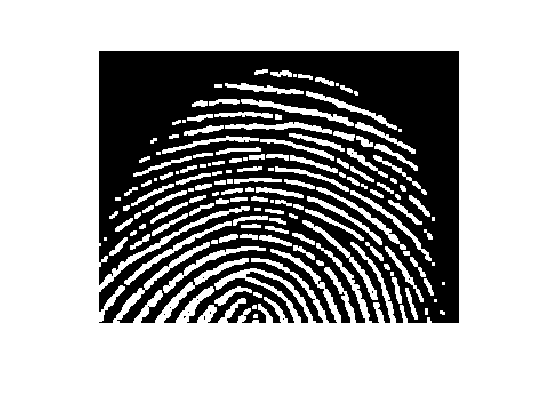

In [23]:
fo = imopen(f, b);
figure, imshow(fo);

However, new gaps between the fingerprint ridges were created. To counter this undesirable effect, we perform a dilation on the opening.

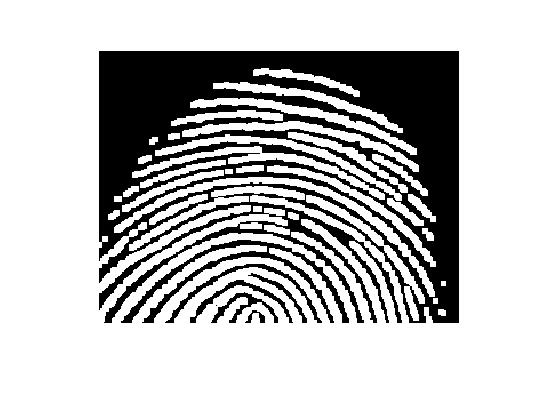

In [24]:
fod = imdilate(fo, b);
figure, imshow(fod);

The next image constitutes the closing of the opening of the 4th image.

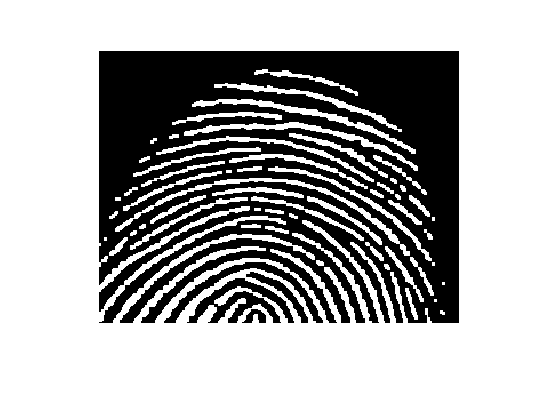

In [26]:
foc = imclose(fo, b);
figure, imshow(foc);

## 9.5 Some Basic Morphological Algorithms

### 9.5.2 Hole Filling

### Function `imfill`

Function `imfill` performs this compution automatically when the optional argument `'holes'` is used:

**g = imfill(f, 'holes')**

### Example 9.6: Morphological hole filtering.

Figure 9.16(a) shows an image composed of white circles with black inner spots.

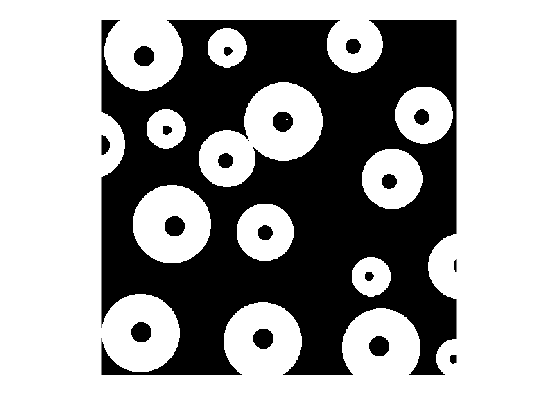

In [33]:
f = imread('Fig0916(a).tif');
imshow(f);

The next images shows the result of filling all the spheres.

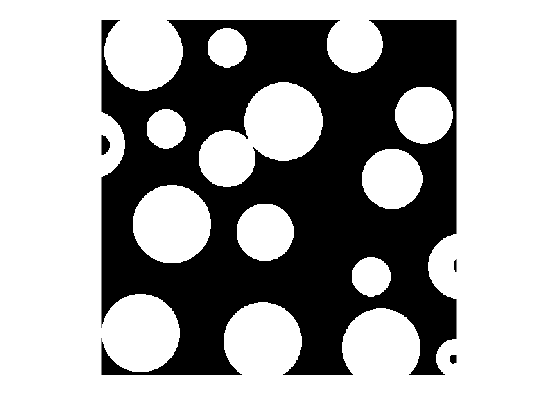

In [34]:
g = imfill(f, 'holes');
figure, imshow(g);

### 9.5.9 Morphological Reconstruction

### Function `imreconstruct`

Function `imreconstruct` uses the "fast hybrid reconstruction" algorithm. The calling syntax for `imreconstruct` is 

**out = imreconstruct(marker, mask)**

Figure 9.29(a) shows an example of opening by reconstruction.

警告: 图像太大，无法在屏幕上显示；将以 50% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



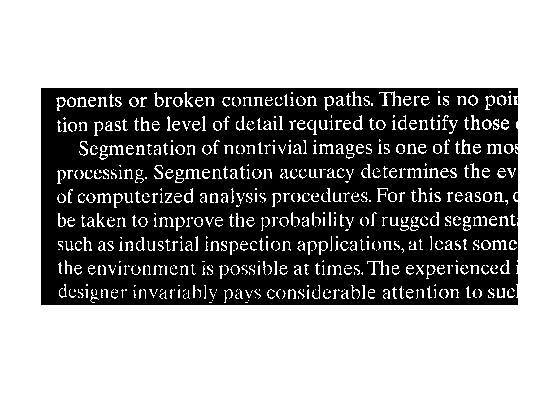

In [35]:
f = imread('Fig0929(a).tif');
imshow(f);

The next image shows the erosion of Fig. 9.29(a) with a structuring element of length proportional to the average height of the tall characters (51 pixels) and width of one pixel.

警告: 图像太大，无法在屏幕上显示；将以 50% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



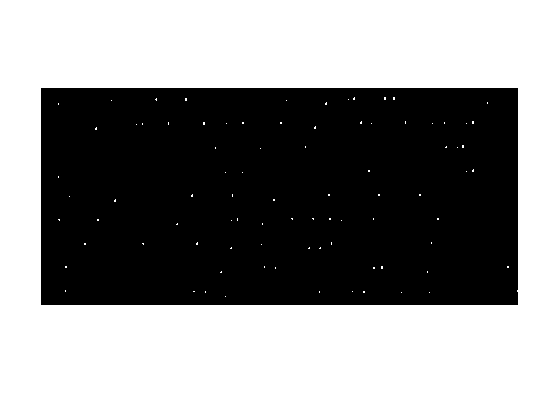

In [41]:
b = ones(51, 1);
fe = imerode(f, b);
figure, imshow(fe);

For the purpose of comparison, we computed the opening of the image using the same structuring element. The next image shows the result.

警告: 图像太大，无法在屏幕上显示；将以 50% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



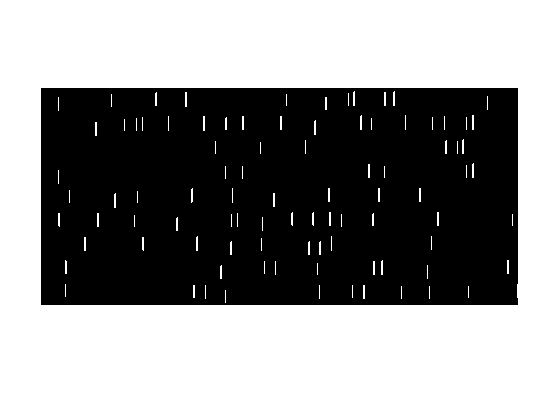

In [42]:
fo = imopen(f, b);
figure, imshow(fo);

The final image is the opening by reconstruction of size 1. This result shows that characters containing long vertical strokes were restored accurately; all other characters were removed.

警告: 图像太大，无法在屏幕上显示；将以 50% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



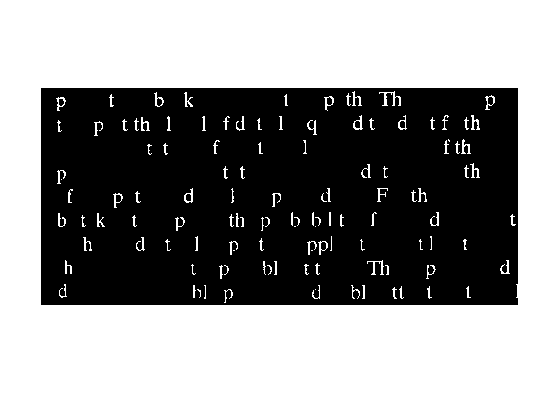

In [43]:
g = imreconstruct(fo, f);
figure, imshow(g);

## 9.6 Gray-Scale Morphology

### 9.6.1 Erosion and Dilation

### Example 9.9: Illystration of gray-scale erosion and dilation.

Figure 9.35(a) is a gray-scale X-ray image.

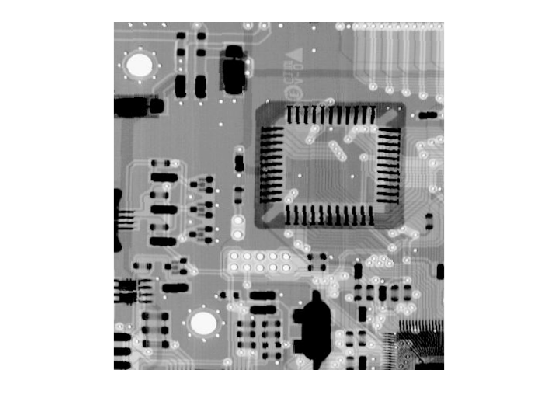

In [46]:
f = imread('Fig0935(a).tif');
imshow(f);

The next image shows the erosion of Fig. 9.35(a) using a disk SE of unit height and a radius of two pixels. Note how the intensities of the small bright dots were reduced, making them barely visible in the next image.

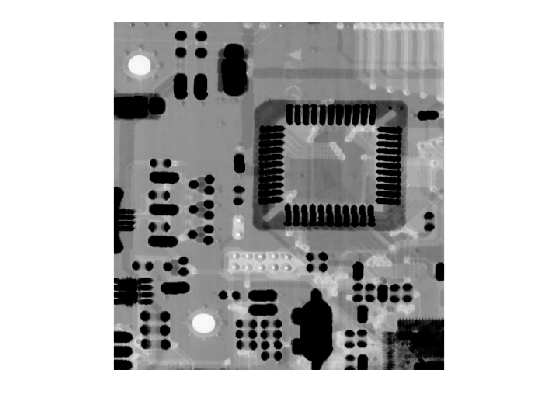

In [47]:
b = strel('disk', 2);
g = imerode(f, b);
figure, imshow(g);

Similarly, Fig. 9.35(c) shows the result of dilation with the same SE. The bright features were thickened and the intensities of the dark features were reduced.

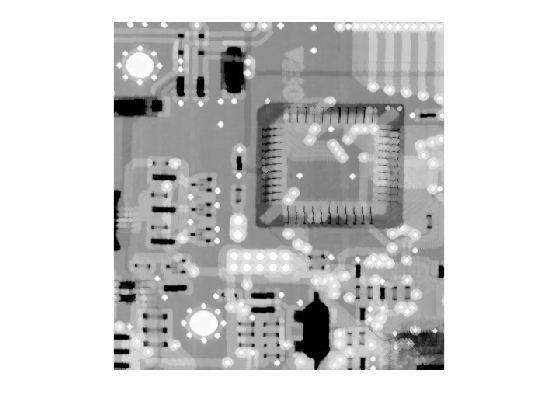

In [48]:
h = imdilate(f, b);
figure, imshow(h);

### 9.6.2 Opening and Closing

### Example 9.10: Illustration of gray-scale opening and closing.

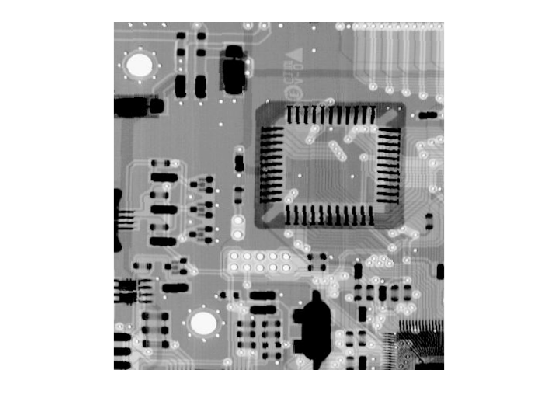

In [1]:
f = imread('Fig0937(a).tif');
imshow(f);

The following image is the opening obtained using a disk structuring elment of unit height and radius of 3 pixels. The intensity of all bright features decreased, depending on the size of the features relative to the size of SE.

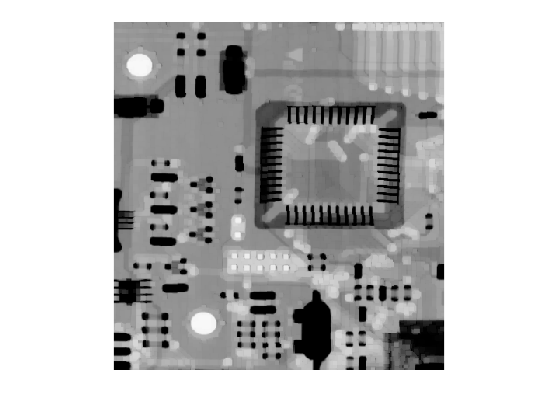

In [2]:
b3 = strel('disk', 3);
g = imopen(f, b3);
figure, imshow(g);

Similarly, the next image shows the closing of the image with a disk of radius 5. In this image , the bright details and background were relatively unaffected, but the dark features were attenuated.

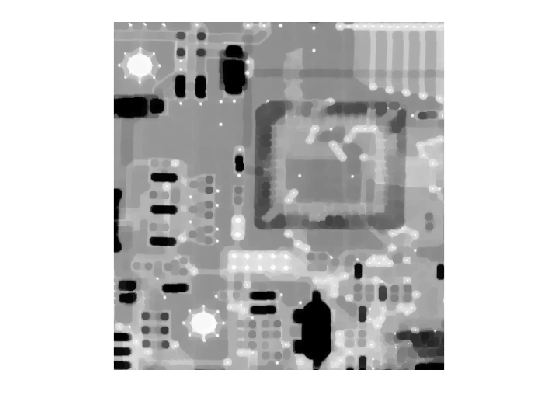

In [3]:
b5 = strel('disk', 5);
h = imclose(f, b5);
figure, imshow(h);

**Morphological gradient**

Figure 9.39 shows an example. Figure 9.39(a) is a head CT scan, and the next two figures are the opening and closing with a $3\times 3$ SE of all 1s. Note the thickening and shrinking.

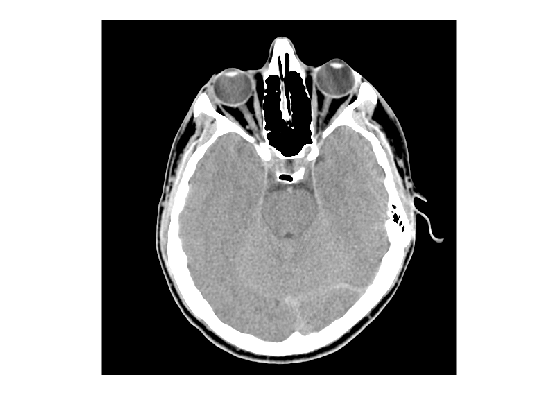

In [52]:
f = imread('Fig0939(a).tif');
imshow(f);

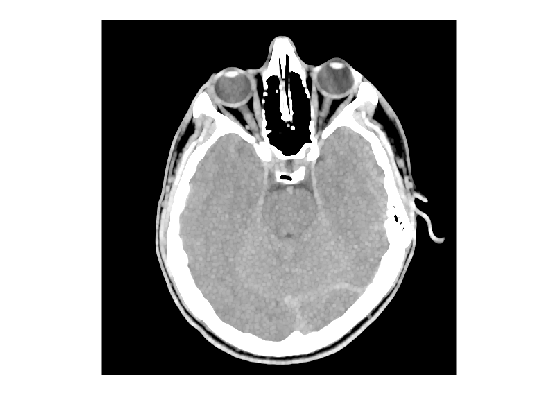

In [53]:
b = ones(3, 3);
fd = imdilate(f, b);
figure, imshow(fd);

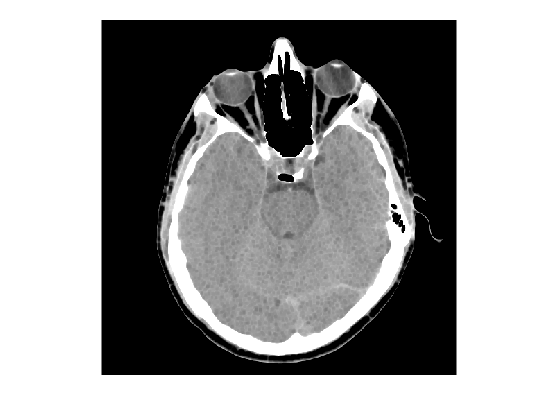

In [54]:
fe = imerode(f, b);
figure, imshow(fe);

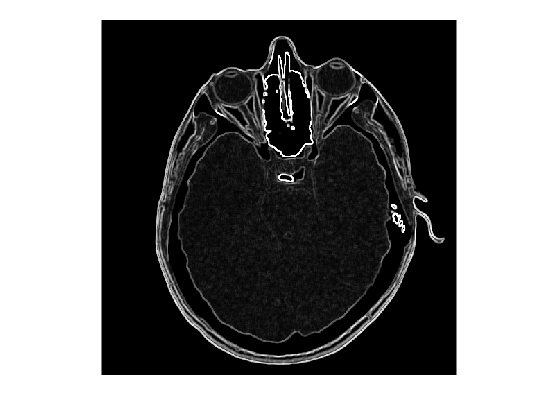

In [57]:
figure, imshow(fd - fe, []);

### 9.6.4 Gray-Scale Morphological Reconstruction

### Function `imtophat`

Function `imtophat` has a similarly syntax with `imdilate` and `imerode`

**D = imtophat(A, B)**

### Example 9.11: Using morphological reconstruction to flatten a complex background.

警告: 图像太大，无法在屏幕上显示；将以 50% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



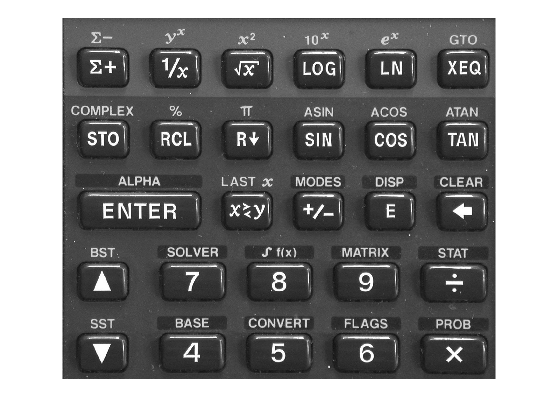

In [63]:
f = imread('Fig0944(a).tif');
imshow(f);

The next image shows the result of opening by reconstruction of the original image using a horizontal line of size $1\times 71$ pixels in the erosion operation.

警告: 图像太大，无法在屏幕上显示；将以 50% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



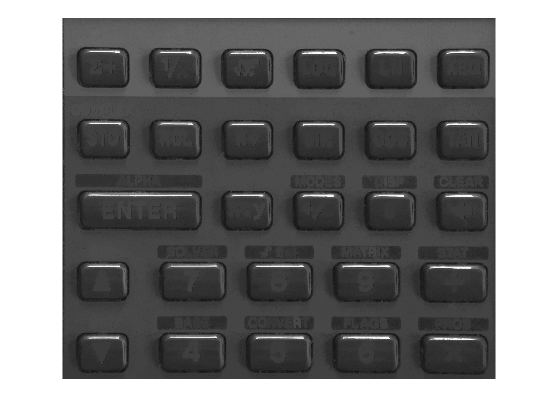

In [67]:
b71 = ones(1, 71);
fobr = imreconstruct(imerode(f, b71), f);
figure, imshow(fobr);

Opening of the original image using the same line.

警告: 图像太大，无法在屏幕上显示；将以 50% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



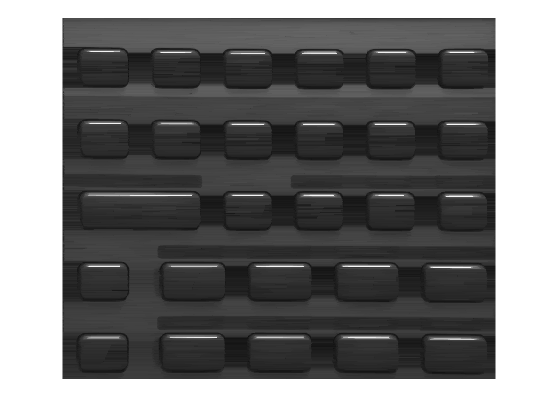

In [68]:
fo = imopen(f, b71);
figure, imshow(fo);

The next image shows the result of substracting the 2nd image from the original image.

警告: 图像太大，无法在屏幕上显示；将以 50% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



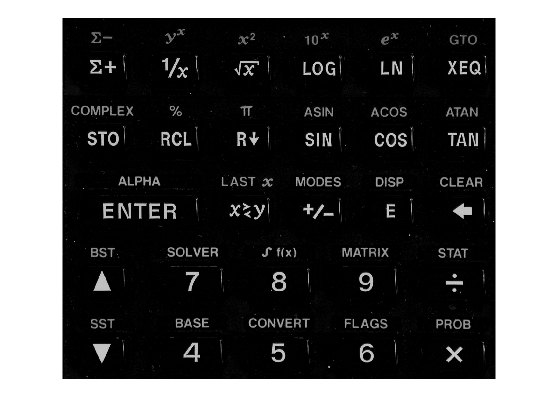

In [70]:
fthr = f - fobr;
figure, imshow(fthr);

The next image shows the result of performing just a top-hat transformation.

警告: 图像太大，无法在屏幕上显示；将以 50% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



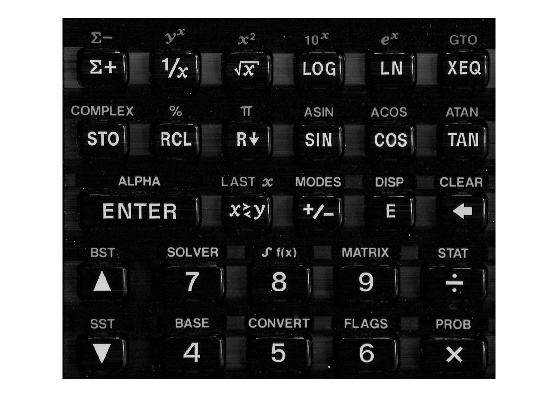

In [72]:
fth = imtophat(f, b71);
figure, imshow(fth);

The next image shows the result of performing operation on the 4th image.

警告: 图像太大，无法在屏幕上显示；将以 50% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



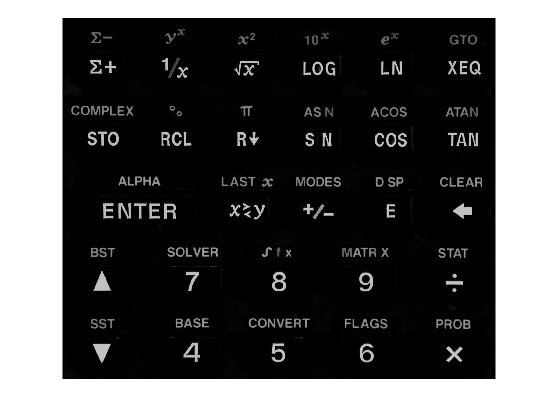

In [75]:
gobr = imreconstruct(imerode(fthr, ones(1, 11)), fthr);
figure, imshow(gobr);

The next image, obtained by dilating the 6th image with a line SE of size $1\times 21$.

警告: 图像太大，无法在屏幕上显示；将以 50% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



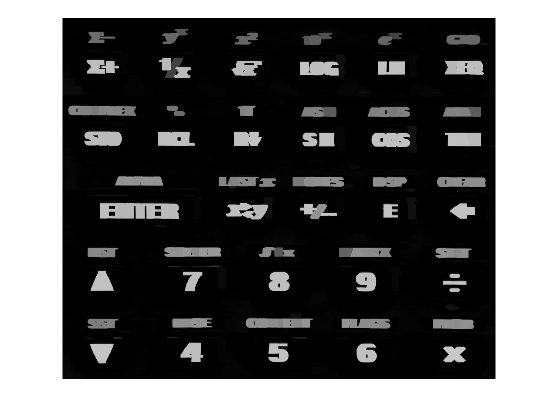

In [76]:
gobrd = imdilate(gobr, ones(1, 21));
figure, imshow(gobrd);

The next image shows the minimum image.

警告: 图像太大，无法在屏幕上显示；将以 50% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



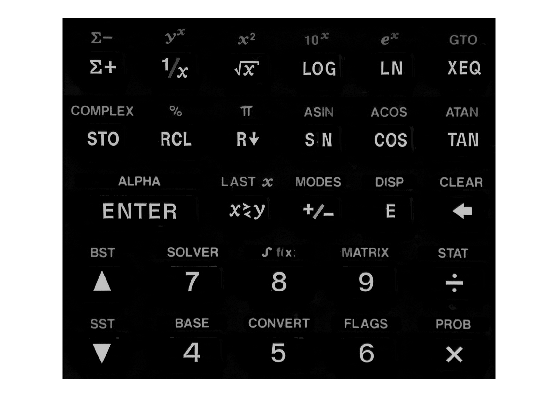

In [77]:
h = min(fthr, gobrd);
figure, imshow(h);

By using image $h$ as a marker and the dilated image as the mask in gray-scale reconstruction, we obtain the final result.

警告: 图像太大，无法在屏幕上显示；将以 50% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



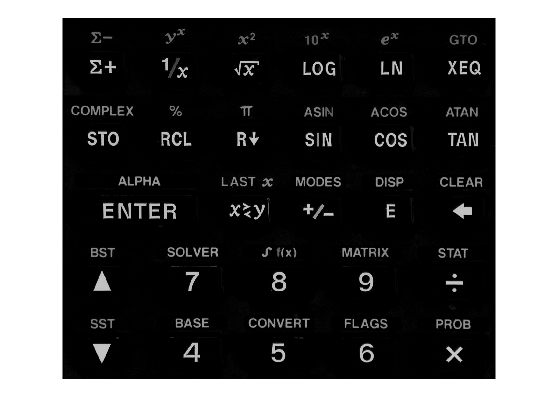

In [78]:
k = imreconstruct(h, fthr);
figure, imshow(k);